<a href="https://colab.research.google.com/github/AnaKarenDRIV/FinanzasUniversitarias/blob/main/RED%20NEURONAL%20MULTI%20CAPA%20/IA_PP_ver9_paso_a_pasito_no_dejes_de_tambalear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# RED NEURONAL MULTICAPA

"""
Objetivo: El siguiente código tiene como finalidad crear un sistema que
predice la idoneidad de candidatos (0-1) basándose solo en habilidades técnicas,
eliminando sesgos de edad y género.
"""


import pandas as pd #importamos pandas, para manipular nuestros datos
import numpy as np #importamos numpy, para la red neuronal
import matplotlib.pyplot as plt #matplotlib para las gráficas
import seaborn as sns #Para poner mamalonas las gráficas
from sklearn.preprocessing import StandardScaler  #Para estandarizar los datos
from sklearn.decomposition import PCA  #para el PCA (preprocesamiento de datos)
from sklearn.model_selection import train_test_split #Para dividir los datos en entrenamiento, validación y prueba.
import tensorflow as tf # Framework principal para crear redes neuronales.
from tensorflow import keras #Permite construir modelos de redes neuronales con pocas líneas.
                             #keras: es una interfaz más amigable que vive dentro de TensorFlow.
from tensorflow.keras import layers #layers: son las capas de la red (densas, convolucionales, dropout, etc.).
                                    #Aquí se definen las neuronas y cómo se conectan.

import warnings
warnings.filterwarnings('ignore') #Desactiva los mensajes de advertencia (warnings) que podrían aparecer en la consola.
                                   #Nada más para que se vea más limpia la consola
# Configuración visual
plt.style.use('default') #Restaura el estilo visual estándar de matplotlib.
sns.set_palette("husl") #Cambia los colores por una paleta más agradable y diferenciada (husl = tonos suaves y variados).


print("SISTEMA DE RECLUTAMIENTO SIN SESGOS - RED NEURONAL MULTICAPA")
print("Ready go!! alv!!!")

SISTEMA DE RECLUTAMIENTO SIN SESGOS - RED NEURONAL MULTICAPA
Ready go!! alv!!!


In [ ]:


# PASO 1: CARGAR DATOS

print("PASO 1: CARGA DE DATOS")

df = pd.read_excel("/content/BASE_DATOS_RECLUTAMIENTO_20251025_2128.xlsx")

# print(f" Datos cargados: {df.shape[0]} candidatos, {df.shape[1]} columnas") #shape[0]- filas, shape[1]-columnas
print(f"\n Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    tipo = df[col].dtype
    nulos = df[col].isnull().sum()
    print(f"   {i:2d}. {col:40s} | Tipo: {tipo} | Nulos: {nulos}")

PASO 1: CARGA DE DATOS

 Columnas disponibles:
    1. ID_Candidato                             | Tipo: object | Nulos: 0
    2. Nombre_Completo                          | Tipo: object | Nulos: 0
    3. Email                                    | Tipo: object | Nulos: 0
    4. Telefono                                 | Tipo: int64 | Nulos: 0
    5. Posicion_Interes                         | Tipo: object | Nulos: 0
    6. Años_Experiencia                         | Tipo: object | Nulos: 0
    7. Cargo_Actual                             | Tipo: object | Nulos: 0
    8. Empresa_Actual                           | Tipo: object | Nulos: 0
    9. Empresas_Anteriores                      | Tipo: object | Nulos: 0
   10. Total_Empresas                           | Tipo: int64 | Nulos: 0
   11. Skills                                   | Tipo: object | Nulos: 0
   12. Num_Skills                               | Tipo: int64 | Nulos: 0
   13. Nivel_Educativo                          | Tipo: object | Nul

In [ ]:

# LIMPIEZA DE DATOS Y ELIMINACIÓN DE SESGOS

print("PASO 2: LIMPIEZA Y ELIMINACIÓN DE SESGOS")


df_work = df.copy() #Generando una copia y guardandola en "df_work"

# ELIMINAR COLUMNAS CON INFORMACIÓN PERSONAL Y SESGOS
columnas_eliminar = [] #una lista vacía

# Información personal (no relevante)
columnas_eliminar.extend(['ID_Candidato', 'Nombre_Completo', 'Email', 'Telefono']) #.extend() sirve para agregar varios elementos a una lista, todo en un solo paso.

# SESGOS A ELIMINAR (edad y género)
columnas_eliminar.extend(['Rango_Edad', 'Genero'])

# Información no relevante para evaluación técnica
columnas_eliminar.extend(['Nivel_Educativo', 'LinkedIn', 'Portfolio_GitHub',
                          'Fecha_Registro', 'Cargo_Actual', 'Empresa_Actual',
                          'Empresas_Anteriores', 'Status', 'Eval'])

# Columnas de evaluación que no son numéricas
columnas_eliminar.extend(['Evaluacion_Completa', 'NIVEL_GENERAL', 'RECOMENDACION'])

"""
Ya que tenemos las columnas que vamos a eliminar le vamos dando chicharron
"""

print(f"\n Eliminando columnas con información sensible y sesgos:")
columnas_eliminadas_real = []
for col in columnas_eliminar:
    if col in df_work.columns:
        df_work = df_work.drop(columns=[col])
        columnas_eliminadas_real.append(col)
        print(f" {col}")

print(f"\n Total columnas eliminadas: {len(columnas_eliminadas_real)}")


PASO 2: LIMPIEZA Y ELIMINACIÓN DE SESGOS

 Eliminando columnas con información sensible y sesgos:
 ID_Candidato
 Nombre_Completo
 Email
 Telefono
 Rango_Edad
 Genero
 Nivel_Educativo
 LinkedIn
 Portfolio_GitHub
 Fecha_Registro
 Cargo_Actual
 Empresa_Actual
 Empresas_Anteriores
 Status
 Evaluacion_Completa
 NIVEL_GENERAL
 RECOMENDACION

 Total columnas eliminadas: 17


In [ ]:
df.head()

,ID_Candidato,Nombre_Completo,Email,Telefono,Posicion_Interes,Años_Experiencia,Cargo_Actual,Empresa_Actual,Empresas_Anteriores,Total_Empresas,...,BFI_Correctas,BFI_Python,BFI_SQL,BFI_Excel,BFI_Estadistica,BFI_Tiempo_Min,BFI_Fecha,PUNTUACION_TOTAL,NIVEL_GENERAL,RECOMENDACION
0,dd314c29,Ramón Jiménez Hernández,ramon.jiménez911@hotmail.com,5513061834,Ml Engineer,3-5,Consultor de Datos,Rappi Mexico,Walmart eCommerce | Rappi Mexico | Globant,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⏳ PENDIENTE EVALUACIÓN
1,e797fa78,Irene Torres González,irene.torres17@gmail.com,5555362262,Data Scientist,3-5,Machine Learning Engineer,Liverpool Labs,Credijusto | Walmart eCommerce | Google Cloud,4,...,7/16,50.0,56.0,40.0,62.0,12.0,2025-09-06,49.8,❌ Insuficiente,❌ NO RECOMENDADO
2,14026b22,Laura Sánchez Reyes,laura.sánchez442@yahoo.com.mx,5519019086,Business Analyst,1-3,Analista de Business Intelligence,PwC Technology,Cornershop,2,...,12/16,91.0,85.0,76.0,88.0,12.5,2025-10-08,80.6,✅ Muy Bueno,✅ ALTAMENTE RECOMENDADO
3,49030e5d,Irene Cruz Martínez,irene.cruz577@hotmail.com,5537839976,Data Scientist,3-5,Especialista en Analytics,Clip,BBVA Innovation | Uber Mexico | Google Cloud,4,...,11/16,60.0,72.0,71.0,86.0,14.1,2025-09-18,73.0,👍 Bueno,👍 RECOMENDADO
4,11286328,Silvia Pérez Ramírez,silvia.pérez293@outlook.com,5589416347,Ml Engineer,10+,Analista de Datos Junior,Santander Tech,Credijusto | Nubank | Clip,4,...,11/16,58.0,83.0,64.0,74.0,13.9,2025-09-03,80.6,✅ Muy Bueno,✅ ALTAMENTE RECOMENDADO


In [ ]:
df.columns

Index(['ID_Candidato', 'Nombre_Completo', 'Email', 'Telefono',
       'Posicion_Interes', 'Años_Experiencia', 'Cargo_Actual',
       'Empresa_Actual', 'Empresas_Anteriores', 'Total_Empresas', 'Skills',
       'Num_Skills', 'Nivel_Educativo', 'Rango_Edad', 'Genero', 'LinkedIn',
       'Portfolio_GitHub', 'Fecha_Registro', 'Status', 'Evaluacion_Completa',
       'Raven_Puntuacion', 'Raven_Nivel', 'Raven_Correctas',
       'Raven_Tiempo_Min', 'Raven_Fecha', 'BFI_Puntuacion', 'BFI_Nivel',
       'BFI_Correctas', 'BFI_Python', 'BFI_SQL', 'BFI_Excel',
       'BFI_Estadistica', 'BFI_Tiempo_Min', 'BFI_Fecha', 'PUNTUACION_TOTAL',
       'NIVEL_GENERAL', 'RECOMENDACION'],
      dtype='object')

In [ ]:

# CREAR VARIABLE OBJETIVO desde RECOMENDACION
if 'RECOMENDACION' in df.columns:
    print(f"\n Creando variable objetivo desde 'RECOMENDACION'...")

    # Mapeo de recomendaciones a valores 0-1
    def mapear_recomendacion(valor):
        if pd.isna(valor):
            return np.nan
        valor_str = str(valor).upper().strip()

        if 'ALTAMENTE' in valor_str:
            return 1.0
        elif 'RECOMENDADO' in valor_str and 'NO' not in valor_str:
            return 0.8
        elif 'CONSIDERAR' in valor_str:
            return 0.5
        elif 'NO RECOMENDADO' in valor_str:
            return 0.0
        else:
            return np.nan

    df_work['Target'] = df['RECOMENDACION'].apply(mapear_recomendacion)

    # Mostrar distribución
    print(f"\n   Distribución de recomendaciones:")
    dist = df['RECOMENDACION'].value_counts()
    for valor, count in dist.items():
        print(f"{valor}: {count} candidatos")

    # Eliminar candidatos sin evaluación
    antes = len(df_work)
    df_work = df_work.dropna(subset=['Target'])
    despues = len(df_work)
    print(f"\n  Candidatos con evaluación válida: {despues}/{antes}")
else:
    raise ValueError("NO se encontró la columna 'RECOMENDACION' en los datos")




 Creando variable objetivo desde 'RECOMENDACION'...

   Distribución de recomendaciones:
👍 RECOMENDADO: 164 candidatos
⚠️ CONSIDERAR: 139 candidatos
✅ ALTAMENTE RECOMENDADO: 81 candidatos
⏳ PENDIENTE EVALUACIÓN: 64 candidatos
❌ NO RECOMENDADO: 52 candidatos

  Candidatos con evaluación válida: 436/500


In [ ]:
print(antes)
print(despues)

500
436


In [ ]:
dist

,count
RECOMENDACION,
👍 RECOMENDADO,164
⚠️ CONSIDERAR,139
✅ ALTAMENTE RECOMENDADO,81
⏳ PENDIENTE EVALUACIÓN,64
❌ NO RECOMENDADO,52


In [ ]:
# Separando el Target del resto
target = df_work['Target'].values
df_work = df_work.drop('Target', axis=1)



In [ ]:
# SELECCIONAR SOLO COLUMNAS NUMÉRICAS
print(f"\n Seleccionando features numéricas...")
numeric_cols = df_work.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n Features finales ({len(numeric_cols)} columnas):")


 Seleccionando features numéricas...

 Features finales (11 columnas):


In [ ]:

for i, col in enumerate(numeric_cols, 1):
    mean_val = df_work[col].mean()
    std_val = df_work[col].std()
    print(f"   {i:2d}. {col:40s} | μ={mean_val:6.2f} | σ={std_val:6.2f}")


    1. Total_Empresas                           | μ=  3.68 | σ=  1.19
    2. Num_Skills                               | μ=  5.04 | σ=  1.42
    3. Raven_Puntuacion                         | μ= 74.19 | σ= 14.40
    4. Raven_Tiempo_Min                         | μ= 10.02 | σ=  1.17
    5. BFI_Puntuacion                           | μ= 69.20 | σ= 12.29
    6. BFI_Python                               | μ= 69.25 | σ= 14.64
    7. BFI_SQL                                  | μ= 69.30 | σ= 14.77
    8. BFI_Excel                                | μ= 68.97 | σ= 13.86
    9. BFI_Estadistica                          | μ= 68.50 | σ= 14.40
   10. BFI_Tiempo_Min                           | μ= 12.57 | σ=  1.45
   11. PUNTUACION_TOTAL                         | μ= 71.20 | σ=  9.74


In [ ]:
numeric_cols

['Total_Empresas',
 'Num_Skills',
 'Raven_Puntuacion',
 'Raven_Tiempo_Min',
 'BFI_Puntuacion',
 'BFI_Python',
 'BFI_SQL',
 'BFI_Excel',
 'BFI_Estadistica',
 'BFI_Tiempo_Min',
 'PUNTUACION_TOTAL']

In [ ]:
df_work.head()

,Posicion_Interes,Años_Experiencia,Total_Empresas,Skills,Num_Skills,Raven_Puntuacion,Raven_Nivel,Raven_Correctas,Raven_Tiempo_Min,Raven_Fecha,BFI_Puntuacion,BFI_Nivel,BFI_Correctas,BFI_Python,BFI_SQL,BFI_Excel,BFI_Estadistica,BFI_Tiempo_Min,BFI_Fecha,PUNTUACION_TOTAL
1,Data Scientist,3-5,4,"ml, r, powerbi, tableau, sql, stats, python",7,54.0,Bajo,6/12,12.0,2025-09-06,47.0,Insuficiente,7/16,50.0,56.0,40.0,62.0,12.0,2025-09-06,49.8
2,Business Analyst,1-3,2,"ml, tableau, excel, powerbi",4,86.0,Alto,10/12,9.2,2025-10-06,77.0,Intermedio,12/16,91.0,85.0,76.0,88.0,12.5,2025-10-08,80.6
3,Data Scientist,3-5,4,"r, tableau, sql, excel",4,73.0,Medio,8/12,11.7,2025-09-15,73.0,Intermedio,11/16,60.0,72.0,71.0,86.0,14.1,2025-09-18,73.0
4,Ml Engineer,10+,4,"excel, stats, tableau, r",4,98.0,Superior,11/12,10.3,2025-09-01,69.0,Básico,11/16,58.0,83.0,64.0,74.0,13.9,2025-09-03,80.6
5,Data Analyst,1-3,2,"sql, r, ml, powerbi, excel, tableau",6,86.0,Alto,10/12,11.0,2025-09-19,95.0,Experto,15/16,100.0,99.0,100.0,94.0,10.6,2025-09-22,91.4


In [ ]:

for i, col in enumerate(numeric_cols, 1):
    mean_val = df_work[col].mean()
    std_val = df_work[col].std()
    print(f"   {i:2d}. {col:40s} | μ={mean_val:6.2f} | σ={std_val:6.2f}")

    1. Total_Empresas                           | μ=  3.68 | σ=  1.19
    2. Num_Skills                               | μ=  5.04 | σ=  1.42
    3. Raven_Puntuacion                         | μ= 74.19 | σ= 14.40
    4. Raven_Tiempo_Min                         | μ= 10.02 | σ=  1.17
    5. BFI_Puntuacion                           | μ= 69.20 | σ= 12.29
    6. BFI_Python                               | μ= 69.25 | σ= 14.64
    7. BFI_SQL                                  | μ= 69.30 | σ= 14.77
    8. BFI_Excel                                | μ= 68.97 | σ= 13.86
    9. BFI_Estadistica                          | μ= 68.50 | σ= 14.40
   10. BFI_Tiempo_Min                           | μ= 12.57 | σ=  1.45
   11. PUNTUACION_TOTAL                         | μ= 71.20 | σ=  9.74


In [ ]:


# Crear matriz de features
X = df_work[numeric_cols].values
y = target

print(f"\n DATOS FINALES:")
print(f"   • Features (X): {X.shape}")
print(f"   • Target (y): {y.shape}")
print(f"   • Candidatos totales: {len(X)}")



 DATOS FINALES:
   • Features (X): (436, 11)
   • Target (y): (436,)
   • Candidatos totales: 436


In [ ]:

if len(X) == 0:
    raise ValueError(" ERROR: NO hay datos para entrenar")

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(f" Datos normalizados con StandardScaler")
print(f"   • Media antes: {X.mean():.4f} → después: {X_scaled.mean():.4f}")
print(f"   • Std antes: {X.std():.4f} → después: {X_scaled.std():.4f}")

 Datos normalizados con StandardScaler
   • Media antes: 47.4472 → después: 0.0000
   • Std antes: 31.9540 → después: 1.0000


In [ ]:
# PCA - REDUCCIÓN DE DIMENSIONALIDAD


print("PASO 4: PCA - ANÁLISIS DE COMPONENTES PRINCIPALES")


# Determinar número óptimo de componentes (mantener 90% de varianza)
n_components = min(10, X_scaled.shape[1])
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print(f"\n Reducción de dimensionalidad:")
print(f"   • Dimensiones originales: {X_scaled.shape[1]}")
print(f"   • Componentes principales: {X_pca.shape[1]}")

PASO 4: PCA - ANÁLISIS DE COMPONENTES PRINCIPALES

 Reducción de dimensionalidad:
   • Dimensiones originales: 11
   • Componentes principales: 10


In [ ]:


print(f"\n Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"   PC{i}: {var*100:5.2f}%")


 Varianza explicada por cada componente:
   PC1: 41.95%
   PC2: 11.71%
   PC3: 10.32%
   PC4:  8.92%
   PC5:  8.59%
   PC6:  8.48%
   PC7:  3.66%
   PC8:  2.93%
   PC9:  2.57%
   PC10:  0.86%


In [ ]:

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
print(f"\n Varianza total capturada: {varianza_acumulada[-1]*100:.2f}%")


 Varianza total capturada: 100.00%



 Gráfica guardada: 1_analisis_pca.png


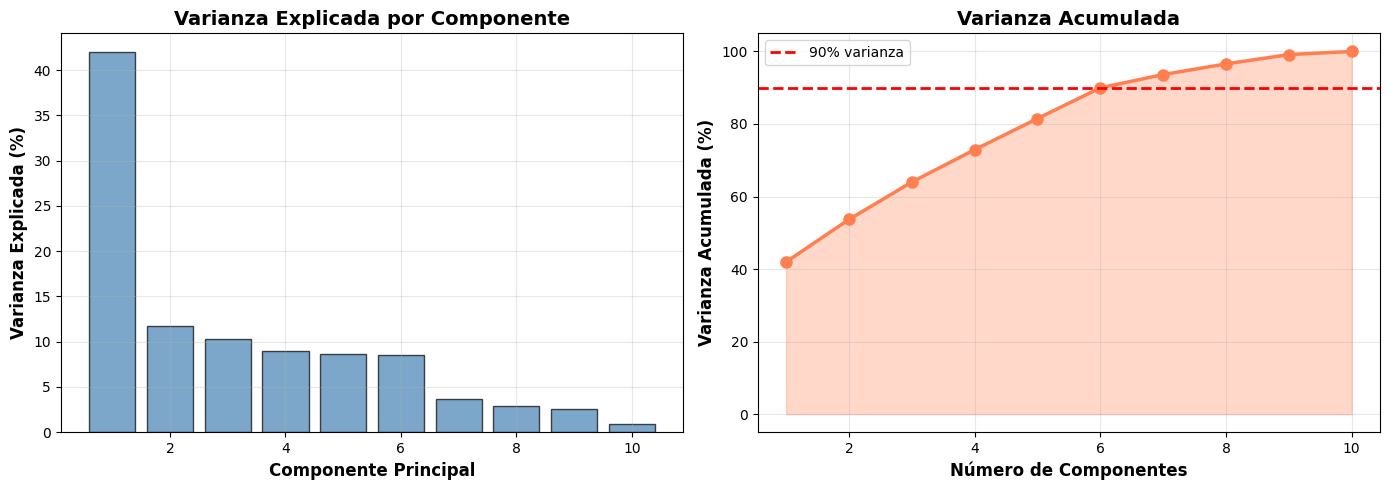

In [ ]:
# Gráfica de PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Varianza por componente
ax1.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_*100, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Componente Principal', fontsize=12, fontweight='bold')
ax1.set_ylabel('Varianza Explicada (%)', fontsize=12, fontweight='bold')
ax1.set_title('Varianza Explicada por Componente', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Varianza acumulada
ax2.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada*100,
         marker='o', linewidth=2.5, markersize=8, color='coral')
ax2.axhline(y=90, color='red', linestyle='--', linewidth=2, label='90% varianza')
ax2.fill_between(range(1, len(varianza_acumulada)+1), varianza_acumulada*100,
                 alpha=0.3, color='coral')
ax2.set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Varianza Acumulada (%)', fontsize=12, fontweight='bold')
ax2.set_title('Varianza Acumulada', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('1_analisis_pca.png', dpi=300, bbox_inches='tight')
print(f"\n Gráfica guardada: 1_analisis_pca.png")
plt.show()
plt.close()



In [ ]:
X_pca

array([[-3.72741856, -1.74221374,  0.98487269, ..., -0.08137835,
        -0.91049686, -0.27915478],
       [ 2.48061487,  0.58205354, -0.05719913, ..., -0.21242129,
        -0.8115652 , -0.54967962],
       [ 0.5288233 , -0.54443461,  0.65098321, ..., -0.59436983,
         0.0314071 ,  0.11255129],
       ...,
       [ 1.06069593, -0.76687028,  1.54347767, ..., -0.53863608,
        -0.13353625, -0.38763255],
       [ 2.74368401, -1.24756576,  1.85462189, ...,  0.58842532,
        -0.2302783 , -0.07206862],
       [-3.96546993, -0.48845712,  0.97251191, ..., -1.3114489 ,
        -0.12631053, -0.38233925]])

In [ ]:
y

array([0. , 1. , 0.8, 1. , 1. , 0. , 1. , 0.8, 0. , 0.8, 0. , 0.8, 0. ,
       0.8, 1. , 1. , 0.5, 0.8, 0.8, 0.8, 0.8, 0.8, 1. , 0.8, 1. , 0.8,
       0. , 0.5, 0.8, 0.5, 0.8, 0.8, 1. , 0.5, 0.5, 1. , 0.8, 0.8, 0.5,
       0.8, 1. , 1. , 0.5, 0.8, 0.8, 0.8, 0.5, 0. , 1. , 0.8, 1. , 1. ,
       0.8, 0.8, 0.5, 1. , 1. , 0.5, 1. , 1. , 0.5, 0.8, 1. , 0.8, 0.8,
       0.8, 0.5, 0.8, 0.5, 0.8, 0.8, 0.8, 0. , 0.8, 0.5, 0.5, 0.8, 0.5,
       0.8, 0. , 0.8, 1. , 0.8, 0.8, 0.5, 0.5, 0.5, 0.5, 0.8, 0.5, 0.8,
       1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 0. , 0.8, 0.8, 0.5, 0.5, 0.8,
       0. , 0.8, 0.8, 1. , 0.5, 0.8, 0.8, 0. , 0.8, 0. , 0. , 0.8, 0.5,
       0.8, 0.5, 1. , 0. , 0.5, 0.5, 0.8, 0.5, 0. , 0. , 0.8, 0.5, 1. ,
       1. , 1. , 0.5, 0.5, 0.5, 1. , 0.8, 0.8, 0.8, 0.8, 0. , 0.5, 0.8,
       0.8, 0.5, 1. , 0.8, 1. , 0.8, 0.8, 1. , 0.8, 0.8, 0. , 1. , 0.5,
       1. , 0.8, 0.8, 0.5, 1. , 0.5, 0.5, 1. , 1. , 0.5, 1. , 0.5, 0.8,
       0.5, 1. , 0.5, 0. , 0.8, 1. , 0.5, 0.8, 0.8, 0.5, 0.8, 0.

In [ ]:
# División 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(  #X_test / y_test el 15% final (con el que se hace la prueba final)
                                                    #X_temp / y_temp el otro 85% restante (que luego todavía se separará)
                                                    #s una función de scikit-learn que sirve para dividir los datos en partes.

    X_pca, y, test_size=0.15, random_state=42 )     #test_size=0.2 significa 20% para test y 80% para train
                                                    #X_pca -> las variables/predictores (features) ya transformadas con PCA
                                                    # y -> las etiquetas / variable objetivo (0/1 por ejemplo)

                                                    # random_state=42 -> asegura que la división sea idéntica cada vez
                                                    #no importa el número:  pudo haber sido 7, 123, 2024…
                                                    # pero 42 se volvió el número “famoso” por el libro Guía del autoestopista galáctico
                                                    #donde 42 es “la respuesta al sentido de la vida” xd


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42  # 0.176*0.85 ≈ 0.15 #Esto sale de una regla de 3, porque no se puede separar en 3 directamente
)

print(f"\nConjuntos de datos:")
print(f"   • Entrenamiento: {X_train.shape[0]} candidatos ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Validación:    {X_val.shape[0]} candidatos ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"   • Prueba:        {X_test.shape[0]} candidatos ({X_test.shape[0]/len(X)*100:.1f}%)")


Conjuntos de datos:
   • Entrenamiento: 304 candidatos (69.7%)
   • Validación:    66 candidatos (15.1%)
   • Prueba:        66 candidatos (15.1%)


In [ ]:
# PASO 6: RED NEURONAL MULTICAPA

print("PASO 6: RED NEURONAL MULTICAPA")


input_dim = X_pca.shape[1]  #Obtiene la dimensión de entrada (número de características/features) que recibirá la red neuronal.
print(input_dim)

PASO 6: RED NEURONAL MULTICAPA
10


In [ ]:
# Arquitectura de la red
model = keras.Sequential([   #Crea un modelo secuencial (capas una tras otra)
    # Entrada
    layers.Input(shape=(input_dim,)), #layers.Input() → DEclara una Capa de entrada
                                      #Donde, cada candidato tendrá un vector de 10 elementos (input_dim)

    # Capa oculta 1: Extracción de características profundas
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),  #layers.Dense ->Declara una capa densa
                                                                                           #Donde:  Todas las neuronas reciben toda la información de la capa anterior.
                                                                                           #Usamos 64 neuronas
                                                                                           #Es una capa densa por que los datos son tabulares (columnas)
                                                                                           #activation='relu'-> Acelera y permite no linealidad (aprendizaje complejo)
                                                                                           #kernel_regularizer=l2(0.001) ->Evita que memorice (reduce overfitting)
                                                                                           #regularizer = “penalizador”
                                                                                          #l2 -> penaliza pesos muy grandes
                                                                                          #0.001-> es la intensidad de ese castigo


    layers.BatchNormalization(),  #BatchNormalization = normalización por lotes
                                  #cuando las neuronas calculan cosas, los números pueden ir creciendo, o tener escalas raras (demasiado grandes o demasiado chicos)
                                  #BatchNormalization agarra los valores y los pone en una escala estable

    layers.Dropout(0.3), #durante el entrenamiento, apaga el 30% de las neuronas de esa capa cada vez que pasas un batch (mini grupo de datos usado en un paso del entrenamiento)

    # Capa oculta 2: Refinamiento de patrones
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), #ahora sólo hay 32 neuronas
    layers.BatchNormalization(),
    layers.Dropout(0.2), #durante el entrenamiento, apaga el 20% de las neuronas de esa capa

    # Capa oculta 3: Características de alto nivel
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),  #durante el entrenamiento, apaga el 10% de las neuronas de esa capa


    # Capa de salida: Probabilidad 0-1 (SIGMOID)
    layers.Dense(1, activation='sigmoid')
])



In [ ]:
# Compilar modelo
model.compile(   #cómo va a aprender y cómo se va a evaluar
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  #
    loss='mse',  # Mean Squared Error para regresión
    metrics=['mae', 'mse']
)

print("\n Modelo compilado:")
print("   • Optimizador: Adam (lr=0.001)")
print("   • Función de pérdida: MSE (Mean Squared Error)")
print("   • Métricas: MAE, MSE")


 Modelo compilado:
   • Optimizador: Adam (lr=0.001)
   • Función de pérdida: MSE (Mean Squared Error)
   • Métricas: MAE, MSE


In [ ]:
# ENTRENAMIENTO

print("PASO 7: ENTRENAMIENTO DE LA RED NEURONAL")

"""evita que la red siga entrenando cuando ya está sobreajustando.  """
callbacks = [    #monitoriando la red
    keras.callbacks.EarlyStopping(  #si la red empieza a empeorar en validación durante X épocas seguidas, detiene el entrenamiento.
        monitor='val_loss',  #está vigilando la pérdida del conjunto de validación
        patience=30, #si pasan 30 épocas sin mejorar → detiene
        restore_best_weights=True, #al final, regresa los pesos de la mejor época
        verbose=1 #imprime mensajes
    ),

    keras.callbacks.ReduceLROnPlateau( #si la pérdida no mejora después de X épocas,reduce el learning rate (lr).
        monitor='val_loss',  #también mira la validación
        factor=0.5,  #reduce el lr a la mitad
        patience=15, #espera 15 épocas antes de reducir
        min_lr=1e-7, #no baja más que ese mínimo
        verbose=1
    )
]



PASO 7: ENTRENAMIENTO DE LA RED NEURONAL


In [ ]:

print("\n Entrenando modelo, ahora sí")

history = model.fit(   #fit = entrena la red.
    X_train, y_train, #X_train → inputs (features), y_train → etiquetas reales (valores objetivo)
    validation_data=(X_val, y_val), #Se usan para evaluar cómo va el modelo cada época.
    epochs=200, #epocas
    batch_size=4, #cuántos candidatos ve la red a la vez antes de actualizar pesos
    callbacks=callbacks, #los dos callbacks que declaramos antes:EarlyStopping, ReduceLROnPlateau
    verbose=0 #no imprime nada
)

print(f"\n Entrenamiento completado en {len(history.history['loss'])} épocas")


 Entrenando modelo, ahora sí

Epoch 102: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 165: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 182: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 197: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Restoring model weights from the end of the best epoch: 197.

 Entrenamiento completado en 200 épocas


In [ ]:
# EVALUACIÓN Y PREDICCIONES

print("PASO 8: EVALUACIÓN Y PREDICCIONES")


# Evaluar en test set
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"\n MÉTRICAS EN CONJUNTO DE PRUEBA:")
print(f"   • Loss (MSE):           {test_loss:.4f}")
print(f"   • MAE (Error absoluto): {test_mae:.4f}")
print(f"   • RMSE:                 {np.sqrt(test_mse):.4f}")



PASO 8: EVALUACIÓN Y PREDICCIONES

 MÉTRICAS EN CONJUNTO DE PRUEBA:
   • Loss (MSE):           0.0066
   • MAE (Error absoluto): 0.0415
   • RMSE:                 0.0604


In [ ]:
# PREDICCIONES PARA TODOS LOS CANDIDATOS
print(f"\n Generando predicciones para todos los candidatos...")
predicciones_todas = model.predict(X_pca, verbose=0).flatten()



 Generando predicciones para todos los candidatos...


In [ ]:
# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Candidato_ID': range(1, len(predicciones_todas) + 1),
    'Probabilidad': predicciones_todas,
    'Evaluacion_Real': y,
    'Decision': ['CONTRATAR' if p >= 0.5 else 'NO CONTRATAR' for p in predicciones_todas]
})

In [ ]:
resultados = resultados.sort_values('Probabilidad', ascending=False).reset_index(drop=True)

In [ ]:

print(f"\n TOP 15 CANDIDATOS RECOMENDADOS POR LA RED NEURONAL:")
print(resultados.head(15).to_string(index=False))


 TOP 15 CANDIDATOS RECOMENDADOS POR LA RED NEURONAL:
 Candidato_ID  Probabilidad  Evaluacion_Real  Decision
          378      0.999904              1.0 CONTRATAR
          409      0.999770              1.0 CONTRATAR
           97      0.999663              1.0 CONTRATAR
          340      0.999549              1.0 CONTRATAR
          338      0.999316              1.0 CONTRATAR
          136      0.998902              1.0 CONTRATAR
          182      0.998600              1.0 CONTRATAR
          161      0.998247              1.0 CONTRATAR
          317      0.998184              1.0 CONTRATAR
           16      0.998135              1.0 CONTRATAR
            5      0.997752              1.0 CONTRATAR
           36      0.997209              1.0 CONTRATAR
           92      0.997039              1.0 CONTRATAR
           98      0.996563              1.0 CONTRATAR
          120      0.995701              1.0 CONTRATAR


In [ ]:
print(resultados.tail(5).to_string(index=False))

 Candidato_ID  Probabilidad  Evaluacion_Real     Decision
          336  1.472441e-05              0.0 NO CONTRATAR
          277  1.281294e-05              0.0 NO CONTRATAR
          240  9.430435e-06              0.0 NO CONTRATAR
          224  7.141207e-06              0.0 NO CONTRATAR
          342  8.133633e-07              0.0 NO CONTRATAR


In [ ]:
# Estadísticas de predicciones
print(f"\n ESTADÍSTICAS DE PREDICCIONES:")
print(f"   • Probabilidad media:    {predicciones_todas.mean():.4f}")
print(f"   • Desviación estándar:   {predicciones_todas.std():.4f}")
print(f"   • Mínimo:                {predicciones_todas.min():.4f}")
print(f"   • Máximo:                {predicciones_todas.max():.4f}")
print(f"   • Candidatos a CONTRATAR (p≥0.5): {(predicciones_todas >= 0.5).sum()}")
print(f"   • Candidatos NO aptos (p<0.5):    {(predicciones_todas < 0.5).sum()}")


 ESTADÍSTICAS DE PREDICCIONES:
   • Probabilidad media:    0.6463
   • Desviación estándar:   0.2860
   • Mínimo:                0.0000
   • Máximo:                0.9999
   • Candidatos a CONTRATAR (p≥0.5): 316
   • Candidatos NO aptos (p<0.5):    120


PASO 9: GENERACIÓN DE GRÁFICAS
Gráfica guardada: 2_historial_entrenamiento.png


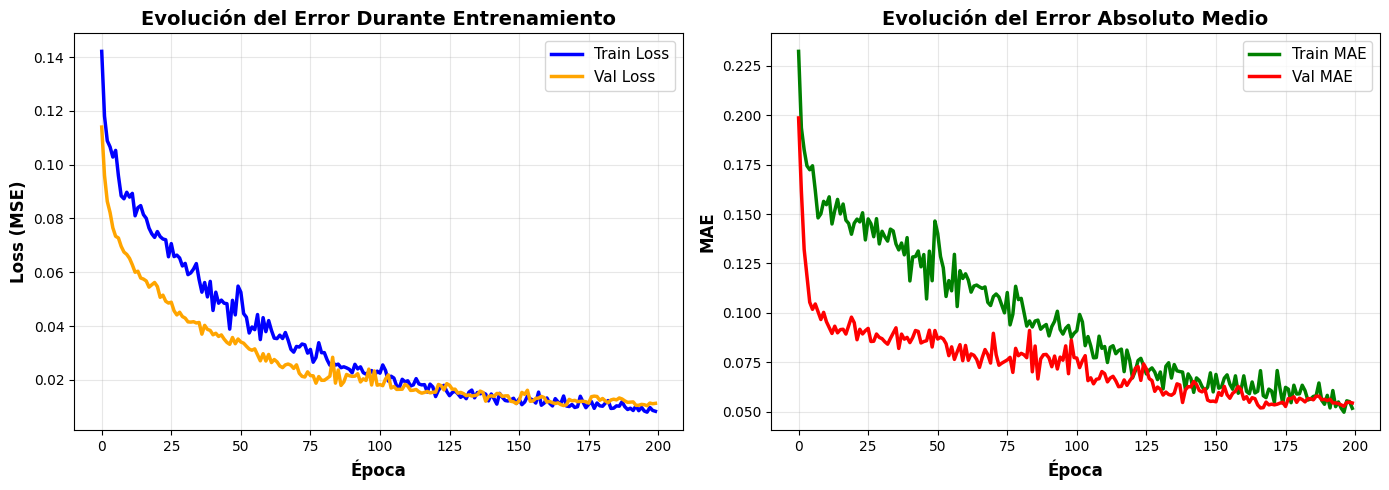

In [ ]:
print("PASO 9: GENERACIÓN DE GRÁFICAS")


# GRÁFICA 1: Historial de entrenamiento
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2.5, color='blue')
axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2.5, color='orange')
axes[0].set_xlabel('Época', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
axes[0].set_title('Evolución del Error Durante Entrenamiento', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2.5, color='green')
axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2.5, color='red')
axes[1].set_xlabel('Época', fontsize=12, fontweight='bold')
axes[1].set_ylabel('MAE', fontsize=12, fontweight='bold')
axes[1].set_title('Evolución del Error Absoluto Medio', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('2_historial_entrenamiento.png', dpi=300, bbox_inches='tight')
print(f"Gráfica guardada: 2_historial_entrenamiento.png")
plt.show()
plt.close()

 Gráfica guardada: 3_analisis_predicciones.png


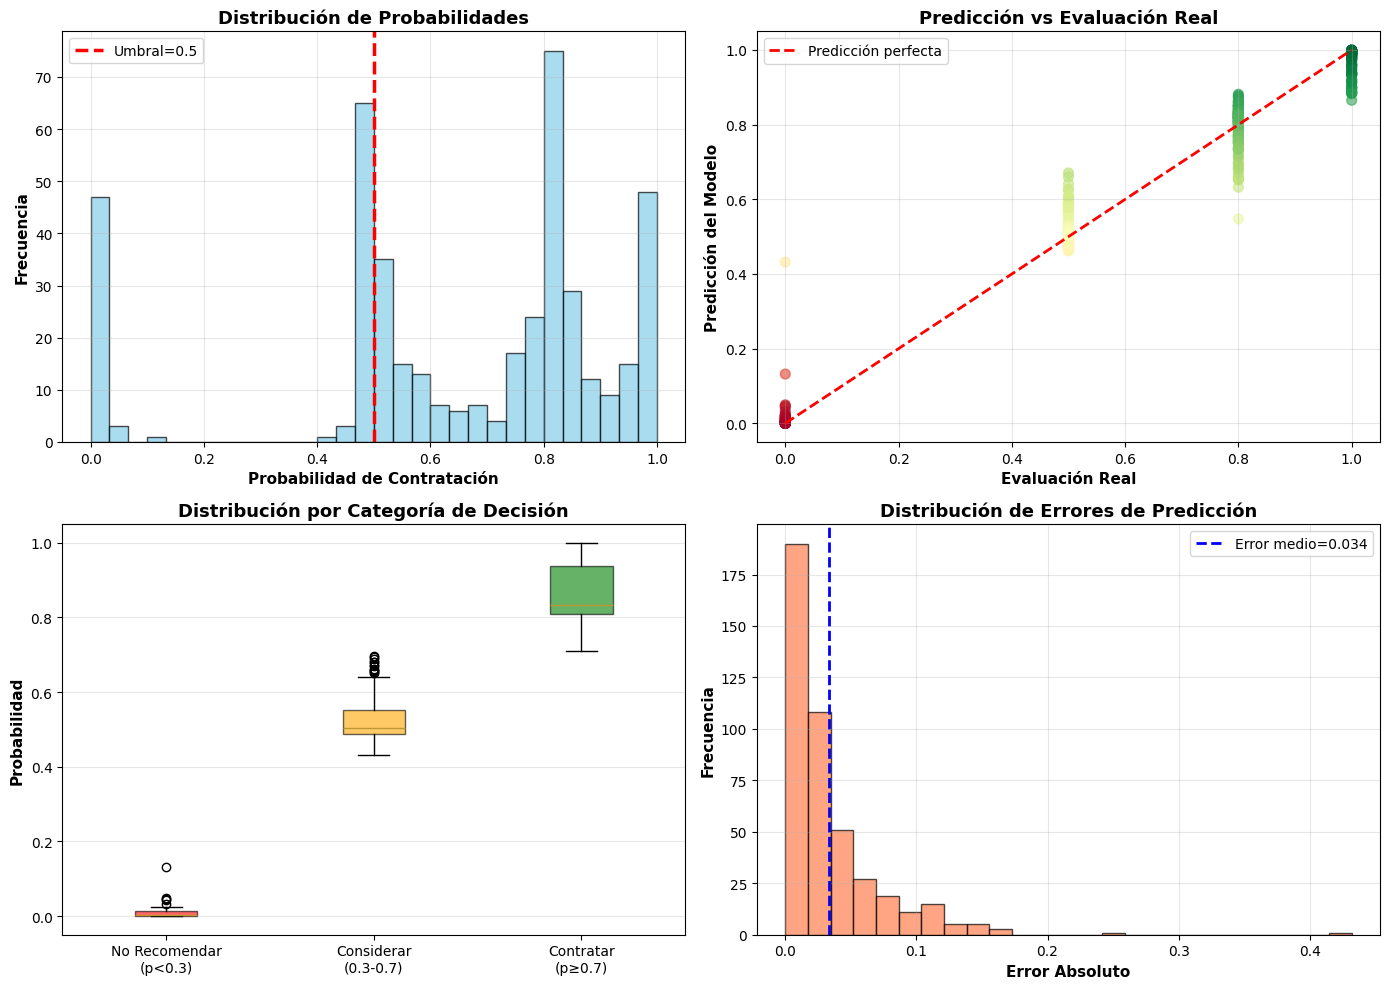

In [ ]:
# GRÁFICA 2: Distribución de probabilidades y comparación
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de probabilidades
axes[0, 0].hist(predicciones_todas, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(x=0.5, color='red', linestyle='--', linewidth=2.5, label='Umbral=0.5')
axes[0, 0].set_xlabel('Probabilidad de Contratación', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribución de Probabilidades', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Scatter: Predicción vs Real
axes[0, 1].scatter(y, predicciones_todas, alpha=0.6, s=50, c=predicciones_todas, cmap='RdYlGn')
axes[0, 1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Predicción perfecta')
axes[0, 1].set_xlabel('Evaluación Real', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Predicción del Modelo', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Predicción vs Evaluación Real', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Box plot de predicciones por categoría
categorias = ['No Recomendar\n(p<0.3)', 'Considerar\n(0.3-0.7)', 'Contratar\n(p≥0.7)']
datos_boxplot = [
    predicciones_todas[predicciones_todas < 0.3],
    predicciones_todas[(predicciones_todas >= 0.3) & (predicciones_todas < 0.7)],
    predicciones_todas[predicciones_todas >= 0.7]
]
bp = axes[1, 0].boxplot(datos_boxplot, labels=categorias, patch_artist=True)
for patch, color in zip(bp['boxes'], ['red', 'orange', 'green']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[1, 0].set_ylabel('Probabilidad', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribución por Categoría de Decisión', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Errores de predicción
errores = np.abs(y - predicciones_todas)
axes[1, 1].hist(errores, bins=25, alpha=0.7, color='coral', edgecolor='black')
axes[1, 1].axvline(x=errores.mean(), color='blue', linestyle='--', linewidth=2,
                   label=f'Error medio={errores.mean():.3f}')
axes[1, 1].set_xlabel('Error Absoluto', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribución de Errores de Predicción', fontsize=13, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('3_analisis_predicciones.png', dpi=300, bbox_inches='tight')
print(f" Gráfica guardada: 3_analisis_predicciones.png")
plt.show()
plt.close()


 Gráfica guardada: 4_top_candidatos.png


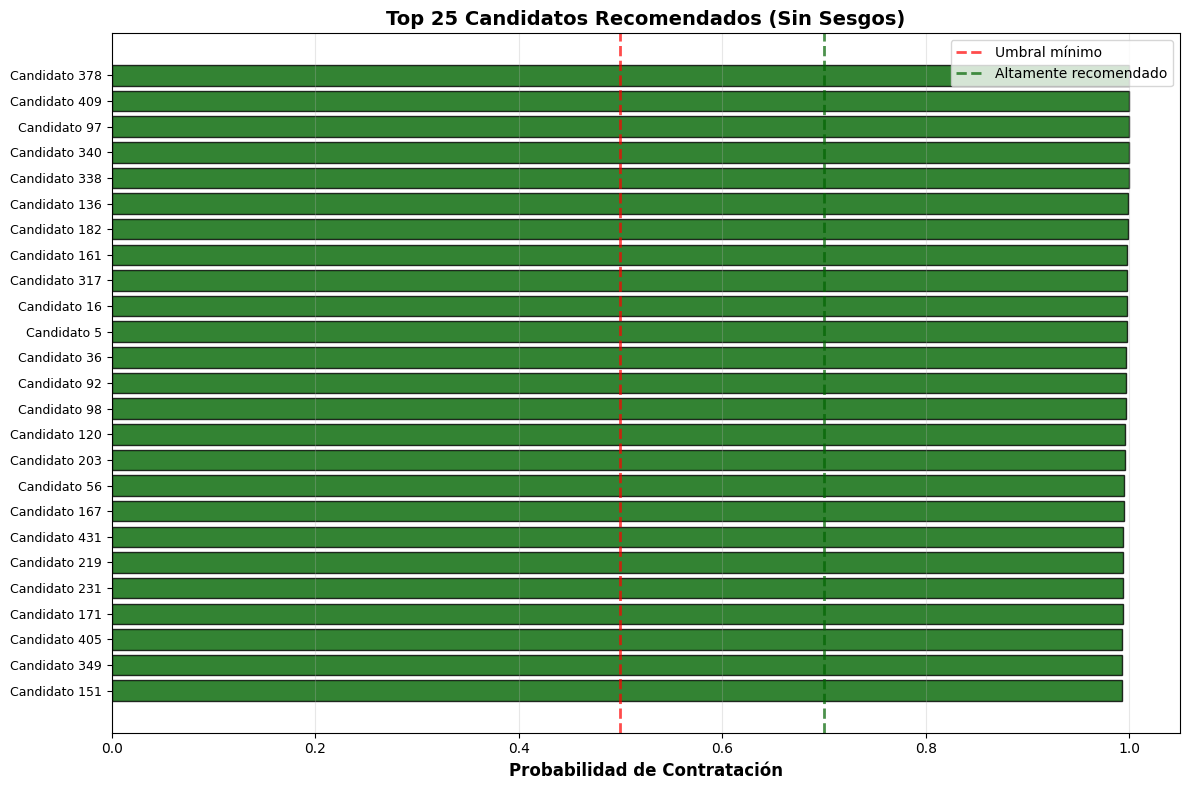

In [ ]:
# GRÁFICA 3: Top candidatos
fig, ax = plt.subplots(figsize=(12, 8))

top_n = min(25, len(resultados))
top_candidatos = resultados.head(top_n)

colores = ['darkgreen' if p >= 0.7 else 'green' if p >= 0.6 else 'orange'
           for p in top_candidatos['Probabilidad']]

bars = ax.barh(range(len(top_candidatos)), top_candidatos['Probabilidad'],
               color=colores, alpha=0.8, edgecolor='black')

ax.set_yticks(range(len(top_candidatos)))
ax.set_yticklabels([f"Candidato {id}" for id in top_candidatos['Candidato_ID']], fontsize=9)
ax.set_xlabel('Probabilidad de Contratación', fontsize=12, fontweight='bold')
ax.set_title(f'Top {top_n} Candidatos Recomendados (Sin Sesgos)',
             fontsize=14, fontweight='bold')
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Umbral mínimo')
ax.axvline(x=0.7, color='darkgreen', linestyle='--', linewidth=2, alpha=0.7,
           label='Altamente recomendado')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('4_top_candidatos.png', dpi=300, bbox_inches='tight')
print(f" Gráfica guardada: 4_top_candidatos.png")
plt.show()
plt.close()

In [ ]:
print("CONCLUSIONES")


print(f"""
 RESULTADOS CLAVE:

1. ELIMINACIÓN DE SESGOS:
   * NO se utilizó EDAD ni GÉNERO en el modelo
   * Decisiones basadas 100% en habilidades técnicas
   * Sistema cumple con principios de equidad laboral

2. RENDIMIENTO DEL MODELO:
   * Error medio (MAE): {test_mae:.4f}
   * RMSE: {np.sqrt(test_mse):.4f}
   * Modelo entrenado con {len(history.history['loss'])} épocas

3. REDUCCIÓN DE DIMENSIONALIDAD (PCA):
   * De {X_scaled.shape[1]} features → {X_pca.shape[1]} componentes
   * Varianza capturada: {varianza_acumulada[-1]*100:.1f}%
   * Modelo más eficiente y menos propenso a overfitting

4. PREDICCIONES (ESCALA 0-1):
   * Total candidatos evaluados: {len(predicciones_todas)}
   * Recomendados (p≥0.5): {(predicciones_todas >= 0.5).sum()}
   * No recomendados (p<0.5): {(predicciones_todas < 0.5).sum()}

INTERPRETACIÓN DE RESULTADOS:

• Probabilidad ≥ 0.7: ALTAMENTE RECOMENDADO (contratar inmediatamente)
• Probabilidad 0.5-0.7: RECOMENDADO (revisar en entrevista)
• Probabilidad 0.3-0.5: CONSIDERAR (segunda revisión)
• Probabilidad < 0.3: NO RECOMENDADO



ARCHIVOS GENERADOS:

• 1_analisis_pca.png
• 2_historial_entrenamiento.png
• 3_analisis_predicciones.png
• 4_top_candidatos.png
• predicciones_candidatos_sin_sesgos.csv
• modelo_reclutamiento.h5
""")

CONCLUSIONES

 RESULTADOS CLAVE:

1. ELIMINACIÓN DE SESGOS:
   * NO se utilizó EDAD ni GÉNERO en el modelo
   * Decisiones basadas 100% en habilidades técnicas
   * Sistema cumple con principios de equidad laboral

2. RENDIMIENTO DEL MODELO:
   * Error medio (MAE): 0.0415
   * RMSE: 0.0604
   * Modelo entrenado con 200 épocas

3. REDUCCIÓN DE DIMENSIONALIDAD (PCA):
   * De 11 features → 10 componentes
   * Varianza capturada: 100.0%
   * Modelo más eficiente y menos propenso a overfitting

4. PREDICCIONES (ESCALA 0-1):
   * Total candidatos evaluados: 436
   * Recomendados (p≥0.5): 316
   * No recomendados (p<0.5): 120

INTERPRETACIÓN DE RESULTADOS:

• Probabilidad ≥ 0.7: ALTAMENTE RECOMENDADO (contratar inmediatamente)
• Probabilidad 0.5-0.7: RECOMENDADO (revisar en entrevista)
• Probabilidad 0.3-0.5: CONSIDERAR (segunda revisión)
• Probabilidad < 0.3: NO RECOMENDADO



ARCHIVOS GENERADOS:

• 1_analisis_pca.png
• 2_historial_entrenamiento.png
• 3_analisis_predicciones.png
• 4_top_cand